In [27]:
import pandas as pd
import numpy as np
import os
from sklearn import datasets
from sklearn.svm import SVC
clf = SVC()

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
# We will drop id column

df = df.iloc[:,1:]
df

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa
...,...,...,...,...
145,3.0,5.2,2.3,virginica
146,2.5,5.0,1.9,virginica
147,3.0,5.2,2.0,virginica
148,3.4,5.4,2.3,virginica


In [6]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['species'] = encoder.fit_transform(df['species'])

In [10]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [11]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [12]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
df.shape

(100, 3)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

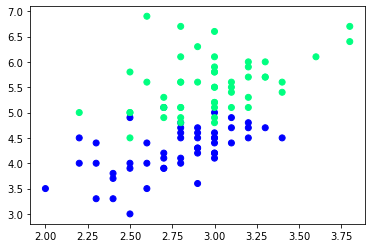

In [15]:
plt.scatter(df['sepal_width'],df['petal_length'], c = df['species'], cmap='winter')

In [16]:
# Taking only 10 rows for training

df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [17]:
df_train

,sepal_width,petal_length,species
94,2.7,4.2,1
77,3.0,5.0,1
108,2.5,5.8,2
69,2.5,3.9,1
122,2.8,6.7,2
85,3.4,4.5,1
107,2.9,6.3,2
79,2.6,3.5,1
65,3.1,4.4,1
72,2.5,4.9,1


In [18]:
df_val

,sepal_width,petal_length,species
87,2.3,4.4,1
101,2.7,5.1,2
83,2.7,5.1,1
144,3.3,5.7,2
146,2.5,5.0,2


In [19]:
df_test

,sepal_width,petal_length,species
114,2.8,5.1,2
91,3.0,4.6,1
64,2.9,3.6,1
137,3.1,5.5,2
95,3.0,4.2,1


In [20]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# CASE 1 - BAGGING

In [21]:
# Data for Tree 1

df_bag = df_train.sample(8, replace= True)
X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

In [22]:
df_bag

,sepal_width,petal_length,species
122,2.8,6.7,2
85,3.4,4.5,1
107,2.9,6.3,2
85,3.4,4.5,1
108,2.5,5.8,2
94,2.7,4.2,1
65,3.1,4.4,1
108,2.5,5.8,2


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from surprise import evaluate

ModuleNotFoundError: No module named 'surprise'

In [24]:
dt_bag1 = DecisionTreeClassifier()

In [28]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

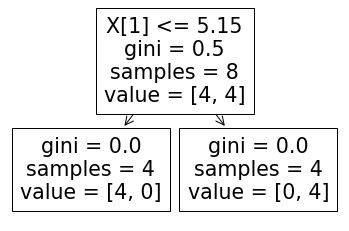

C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


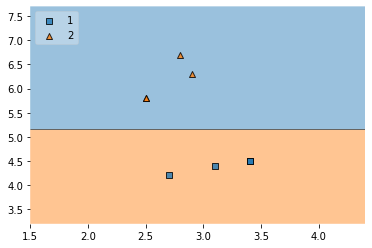

In [30]:
evaluate(dt_bag1,X,Y)

In [31]:
# Data for Tree 1
df_bag = df_train.sample(8, replace=True)

# Fetch X and Y

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

#print df_bag
df_bag

,sepal_width,petal_length,species
108,2.5,5.8,2
108,2.5,5.8,2
77,3.0,5.0,1
122,2.8,6.7,2
94,2.7,4.2,1
65,3.1,4.4,1
94,2.7,4.2,1
122,2.8,6.7,2


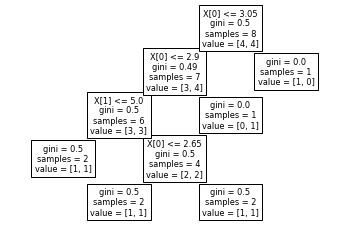

C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


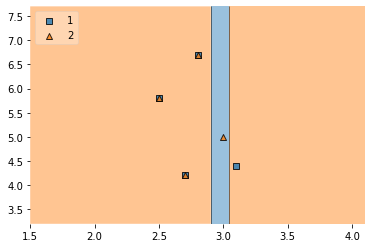

In [32]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,Y)

# Predict

In [33]:
df_test

,sepal_width,petal_length,species
114,2.8,5.1,2
91,3.0,4.6,1
64,2.9,3.6,1
137,3.1,5.5,2
95,3.0,4.2,1


In [34]:
print("Predictor 1", dt_bag1.predict(np.array([3.2,4.7]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.2,4.7]).reshape(1,2)))
    

Predictor 1 [1]
Predictor 2 [1]


C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# TYPES OF BAGING
## 1. PASTING

In [36]:
# Row sampling without replacement

df_train

,sepal_width,petal_length,species
94,2.7,4.2,1
77,3.0,5.0,1
108,2.5,5.8,2
69,2.5,3.9,1
122,2.8,6.7,2
85,3.4,4.5,1
107,2.9,6.3,2
79,2.6,3.5,1
65,3.1,4.4,1
72,2.5,4.9,1


In [37]:
df_train.sample(8)

,sepal_width,petal_length,species
77,3.0,5.0,1
107,2.9,6.3,2
122,2.8,6.7,2
108,2.5,5.8,2
69,2.5,3.9,1
65,3.1,4.4,1
79,2.6,3.5,1
85,3.4,4.5,1


# 2. Random Subspaces

In [38]:
# We do column subspacing
df2 = pd.read_csv('iris.csv')
df2.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
5,5.4,3.9,1.7,0.4,setosa
21,5.1,3.7,1.5,0.4,setosa
66,5.6,3.0,4.5,1.5,versicolor
8,4.4,2.9,1.4,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
28,5.2,3.4,1.4,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica
17,5.1,3.5,1.4,0.3,setosa
104,6.5,3.0,5.8,2.2,virginica


In [39]:
df2.sample(2,replace=True,axis=1)

,petal_length,petal_length
0,1.4,1.4
1,1.4,1.4
2,1.3,1.3
3,1.5,1.5
4,1.4,1.4
...,...,...
145,5.2,5.2
146,5.0,5.0
147,5.2,5.2
148,5.4,5.4


# 3. Random Patches

In [40]:
df

,sepal_width,petal_length,species
128,2.8,5.6,2
68,2.2,4.5,1
113,2.5,5.0,2
126,2.8,4.8,2
124,3.3,5.7,2
...,...,...,...
95,3.0,4.2,1
131,3.8,6.4,2
91,3.0,4.6,1
106,2.5,4.5,2


In [41]:
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_width,petal_length
80,2.4,3.8
116,3.0,5.5
97,2.9,4.3
60,2.0,3.5
106,2.5,4.5
117,3.8,6.7
134,2.6,5.6
137,3.1,5.5
